In [2]:
x = floor(runif(100, min=1, max=101))
y = floor(runif(100, min=1, max=101))
print(x[1:10])
print(y[1:10])

 [1] 61 56 34 53 55 78 76 70 96  2
 [1] 53 62 22  6 87 57 64 22 11 30


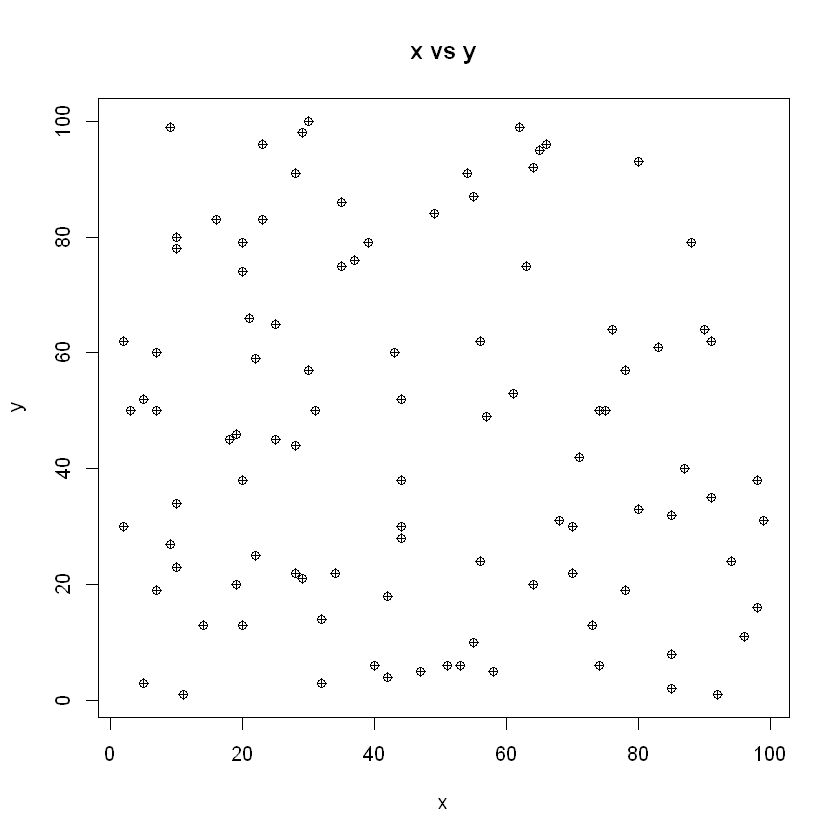

In [3]:
# Plot the chart
plot(x = x, y = y,
     xlab = 'x', ylab = 'y',
     main = 'x vs y',
     pch = 10)

In [4]:
# Determine number of clusters
mydata = data.frame(x = x, y = y)
print(head(mydata))
wss = (nrow(mydata)-1)*sum(apply(mydata,2,var))
for(i in 1:10) wss[i] = sum(kmeans(mydata, 
                                   centers = i)$withinss)

   x  y
1 61 53
2 56 62
3 34 22
4 53  6
5 55 87
6 78 57


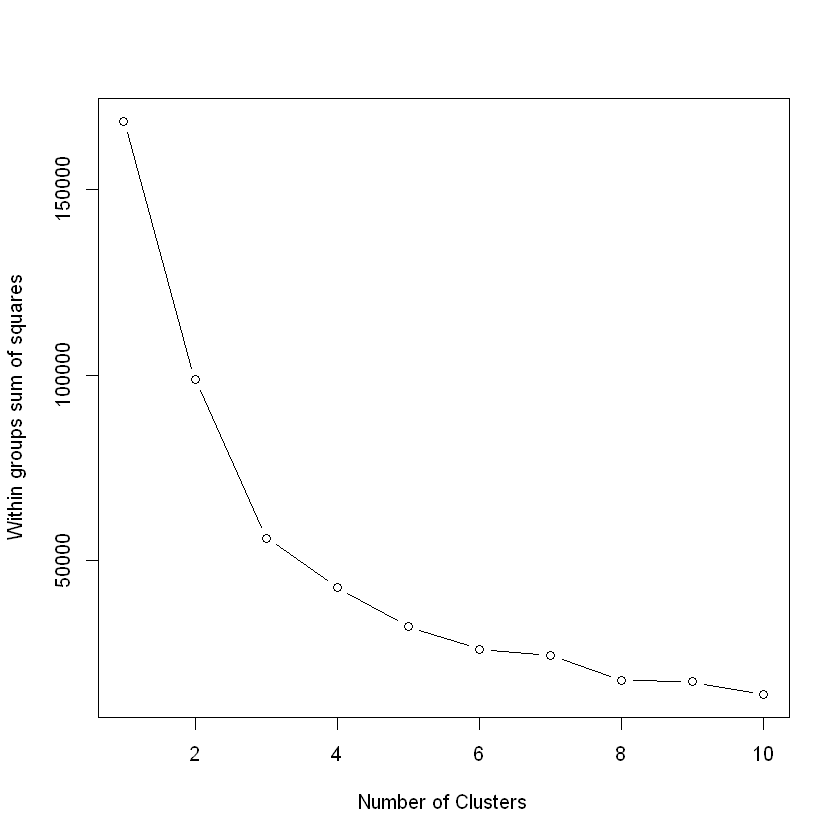

In [5]:
plot(1:10, wss, type='b', xlab='Number of Clusters',
     ylab = 'Within groups sum of squares')

In [6]:
# clustering
set.seed(20)
dataCluster = kmeans(mydata, centers = 4, nstart = 20)
print(dataCluster)


K-means clustering with 4 clusters of sizes 25, 20, 28, 27

Cluster means:
         x        y
1 77.24000 20.20000
2 69.35000 73.15000
3 24.89286 22.75000
4 22.37037 72.59259

Clustering vector:
  [1] 2 2 3 1 2 2 2 1 1 3 3 3 3 3 3 1 3 1 1 4 4 4 4 2 4 1 3 4 3 1 1 2 4 3 2 3 3
 [38] 1 1 2 3 1 3 2 3 4 1 1 3 1 2 2 3 4 2 3 3 3 1 3 4 2 1 3 1 4 2 3 3 1 4 4 2 4
 [75] 4 1 4 1 4 4 1 1 4 4 2 2 2 1 4 3 4 4 4 3 4 4 1 3 2 4

Within cluster sum of squares by cluster:
[1]  9696.56  9093.10 10283.93 10980.81
 (between_SS / total_SS =  76.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [7]:
print('Centroid points:')
print(dataCluster$centers)

[1] "Centroid points:"
         x        y
1 77.24000 20.20000
2 69.35000 73.15000
3 24.89286 22.75000
4 22.37037 72.59259


In [8]:
# Plot the chart
x = c(80, 50, 70)
y = c(30, 45, 75)
data_new = data.frame(x = x, y = y)

clusters =  function(x, centers){
    # compute squared eucliedean distance from each sample to each cluster center
    tmp = sapply(seq_len(nrow(x)),
                 function(i) apply(centers, 1, 
                                   function(v) sum((x[i, ]-v)^2)))
    max.col(-t(tmp)) # find index of min distance
}
new = clusters(data_new, dataCluster[['centers']])
new

[1] 1 3 2

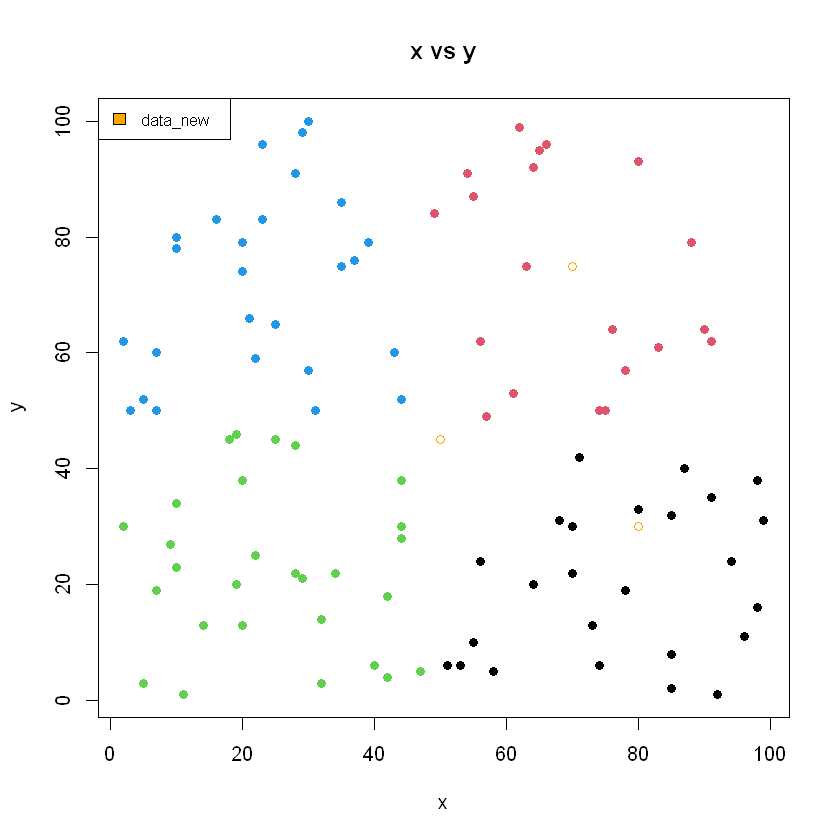

In [9]:
dataCluster$cluster = as.factor(dataCluster$cluster)
plot(x = mydata$x, y = mydata$y,
     xlab='x',
     ylab='y',
     main = 'x vs y', col = dataCluster$cluster,
     pch=19
)
lines(x, y, col='orange', type = 'p')
legend('topleft', c('data_new'), cex=0.8, fill=c('orange'))

In [10]:
library(factoextra) # clustering algorithms & visualization

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



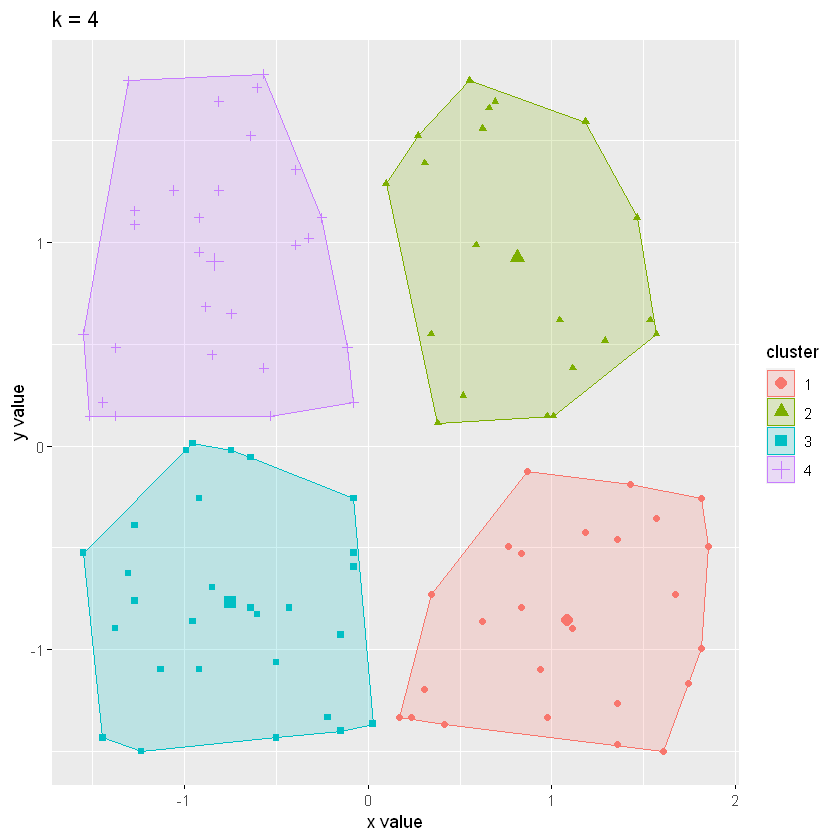

In [11]:
fviz_cluster(dataCluster, geom='point', data=mydata) + 
ggtitle('k = 4')